# INTRODUCTION

### Title
Investing in Speciality Coffee cafes in Singapore

###  Business Problem Description

In the city of Singapore, one of the world’s wealthiest countries, interest and demand of speciality coffee has been on the rise.  Local consumer taste has been evolving beyond that of well-known franchises such as Starbucks and The Coffee Bean in search for unique tastes.  Such coffee is typically found in speciality and hipster cafés which have only begun to emerge in recent years.

<b><i> Objective: </i></b>
The aim of this project is to validate and support an incoming foreign investor planning to setup 3 speciality coffee cafes in to target the local population.

- Target Region: South East Asia


### Target Audience

Foreign investors looking to invest in the cafes

-----------

# DATA & DESCRIPTION

<b> 1) Global Population Density </b>
- Rationale: To validate the investment decision on targeting countries with high population  densities; Implying higher customer reach per café
- Data: Population density per country
- Source: World Bank
 

<b> 2) Gross Domestic Product (GDP) per Capita </b>
- Rationale: To validate the investment decision on targeting markets with high income and hence spending/buying power 
- Data: GDP density per country
- Source: World Bank


<b> 3) Geo-Location of subways </b>
- Rationale:  The Singapore government has been pushing the local population to turn to public transportation over car-ownership in the drive towards sustainability and to avoid city congestion which are commonplace in many developed countries.  Therefore, subway locations can be assumed to see a lot of human traffic
- Data: Geo-location of subways in Singapore
- Source: Various sources



<b> 4) Population by local planning zone (towns) </b>
- Rationale: To identify towns with the largest addressable customer populations
- Data: Population of Singapore Residents by town
- Source: Singstats




<b> 5) Foursquare location data </b>
- Rationale: To understand the number of eateries and potential competition (i.e. other cafes) in proximity of a subway, towards supporting the decision on where to establish the café
- Data: Place of interests by geolocation





 ------------

# METHODOLOGY

- Validate that Singapore is the ideal location in South East Asia to invest into setting up the cafe.  This is to be done by confirming that it's location population has the highest buying power and addressable customer pool (i.e. highest GDP per capita, and highest population density)
- Identify the locations of its subway stations as a target area for setting up the cafe.  Rationale is that the Singapore government is encouraging its population to go car-free and use public transport.  As such, subway stations are likely to have high human traffic volumes
- Next is to identify the various towns within Singapore and prioritize them by population (i.e. implying largest customer pool)
- Each town might have multiple subway stations, therefore using FourSquare venue data would enable the selection of the preferred stations - defined as having the least cafes and having the most other type of food and beverage stores which implies its attraction to locals as a food hub


-----

# RESULTS

In [1]:
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
import matplotlib.cm as cm
import matplotlib.colors as colors
import requests # library to handle requests

In [2]:
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

Solving environment: done

# All requested packages already installed.



In [3]:
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

Solving environment: done

# All requested packages already installed.



In [4]:
# FOURSQUARE ID
CLIENT_ID = 'DBNBYB4BGFBZXNLWMBQHNYCWPSAYEEUCK0X4SDHZW5IBULAE' # your Foursquare ID
CLIENT_SECRET = 'G3KOPOG0EDKGLF03TY1PGOUMUYE3LV5Q0KCFJ2JQOZPNFPFS' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: DBNBYB4BGFBZXNLWMBQHNYCWPSAYEEUCK0X4SDHZW5IBULAE
CLIENT_SECRET:G3KOPOG0EDKGLF03TY1PGOUMUYE3LV5Q0KCFJ2JQOZPNFPFS


In [5]:
# FINDING LAT LONG FOR Singapore

address = 'Singapore'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Singapore are {}, {}.'.format(latitude, longitude))

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  after removing the cwd from sys.path.


The geograpical coordinate of Singapore are 1.2904753, 103.8520359.


#### Extract data sets

In [6]:
#IMPORT GDP PER CAPITA BY COUNTRY DATA
GDPperCapita = pd.read_csv("Capstone Data/GDPperCapitaByCountry.csv")

#IMPORT POPULATION DENSITY BY COUNTRY DATA
PopDensity = pd.read_csv("Capstone Data/PopulationDensityWorldBank.csv")

#IMPORT POPULATION  BY TOWN IN SINGAPORE
TownPop = pd.read_csv("Capstone Data/PopulationByPlanningZong.csv")

# IMPORT SUBWAY LOCATIONS IN SINGAPORE - East/West Line
EWSubwayLoc = pd.read_csv("Capstone Data/MRTLocations.csv")

In [7]:
GDPperCapita.rename(columns = {"2017":"GDPperCapita"}, inplace = True)
GDPperCapita.rename(columns = {"Country Name":"Country"}, inplace = True)
PopDensity.rename(columns = {"2017":"PopulationDensity"}, inplace = True)
PopDensity.rename(columns = {"Country Name":"Country"}, inplace = True)

In [8]:
GDPperCapita.sort_values(['GDPperCapita'], ascending=False, inplace=True)
GDPperCapita.reset_index(drop=True, inplace=True)
Top20_GDPperCapita = GDPperCapita.head(20)

PopDensity.sort_values(['PopulationDensity'], ascending=False, inplace=True)
PopDensity.reset_index(drop=True, inplace=True)
Top20_PopDensity = PopDensity.head(20)

### >>> Plot top 20 countries by GDP per Capita (Data source: World Bank)

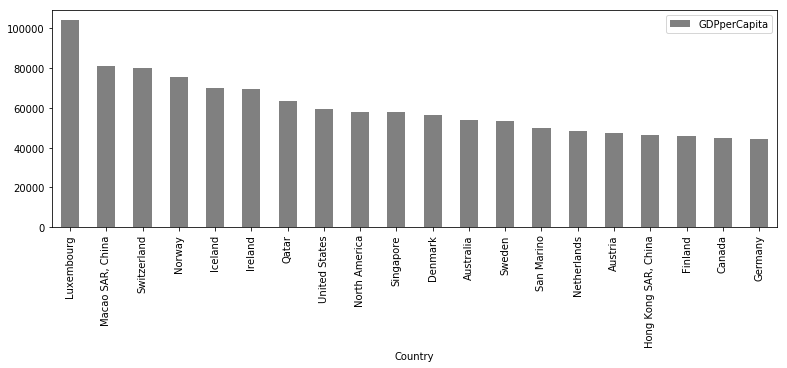

In [9]:
Top20_GDPperCapita.plot(kind='bar', x='Country', y='GDPperCapita', color='gray', figsize=(13, 4), rot=90) # rotate the bars by 90 degrees

### >>> Plot Top 20 countries by Population Density (Data Source: World Bank)

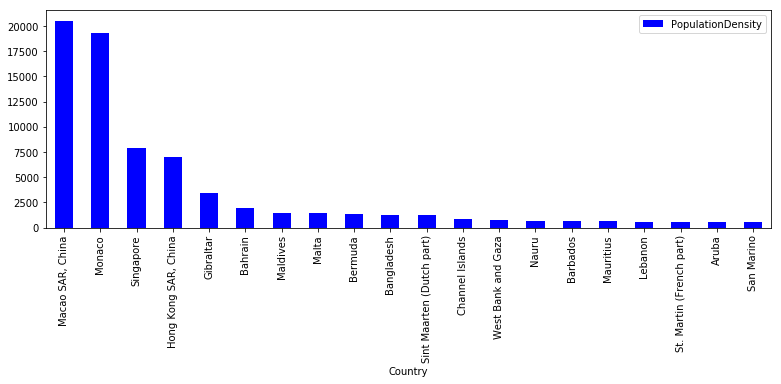

In [10]:
Top20_PopDensity.plot(kind='bar', x='Country', y='PopulationDensity', color='blue', figsize=(13, 4), rot=90) # rotate the bars by 90 degrees

----------

### >>> Location of SINGAPORE on the Map

In [143]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=4)

folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup="Singapore",
        color='Red').add_to(map_clusters)
map_clusters

-----

### >>> Strategy Approach:  Locate speciality coffee place near the subway (i.e. Mass Rapid Transit network) 
- Focused on the East/West and  North/South line

In [12]:
EWSubwayLoc_Green = EWSubwayLoc.query('LineName == "Green"')
EWSubwayLoc_Red = EWSubwayLoc.query('LineName == "Red"')

In [120]:
print("Number of stations:")
print("East/West line: ", EWSubwayLoc_Green["LineName"].count())
print("North/South line: ", EWSubwayLoc_Red["LineName"].count())

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(EWSubwayLoc_Green['Latitude'], EWSubwayLoc_Green['Longitude'], EWSubwayLoc_Green['Station'], EWSubwayLoc_Green['LineName']):
    label = folium.Popup(str(poi) + ' Cluster, ' + str(cluster) + ' line', parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color='green',
        fill=True,
        fill_opacity=0.7).add_to(map_clusters)

for lat, lon, poi, cluster in zip(EWSubwayLoc_Red['Latitude'], EWSubwayLoc_Red['Longitude'], EWSubwayLoc_Red['Station'], EWSubwayLoc_Red['LineName']):
    label = folium.Popup(str(poi) + ' Cluster, ' + str(cluster) + ' line', parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color='red',
        fill=True,
        fill_opacity=0.7).add_to(map_clusters)
    
map_clusters

Number of stations:
East/West line:  33
North/South line:  23


- Map shows the location of Singapore's East/West (Green) and North/South (Red) lines

### >>> Strategy Approach: Target towns with the highest population densities

In [14]:
print("\n")
print("Total number of towns in Singapore: ", TownPop['PlanningArea'].count())
print("\n")
TownPop.head(10)



Total number of towns in Singapore:  49




,PlanningArea,Total_Singapore_Residents
0,Ang Mo Kio,165710
1,Bedok,281300
2,Bishan,88490
3,Boon Lay,30
4,Bukit Batok,144410
5,Bukit Merah,151870
6,Bukit Panjang,140820
7,Bukit Timah,77280
8,Changi,2080
9,Choa Chu Kang,187510


- Data shows the population by town (i.e. Planning Area) across the country

### >>> Mapping town population data to subway locations to identify which subways serve the largest population

In [15]:
EWSubwayLoc.rename(columns = {"PlanningZone":"PlanningArea"}, inplace = True)

In [16]:
Subway2 = pd.merge(EWSubwayLoc, TownPop, how='left', on=['PlanningArea'])

In [17]:
SubwayPerTown = Subway2.groupby('PlanningArea').agg({"Station": 'count', "Total_Singapore_Residents": 'mean'})
SubwayPerTown.sort_values(['Total_Singapore_Residents'], ascending=False, inplace=True)

Population per Town


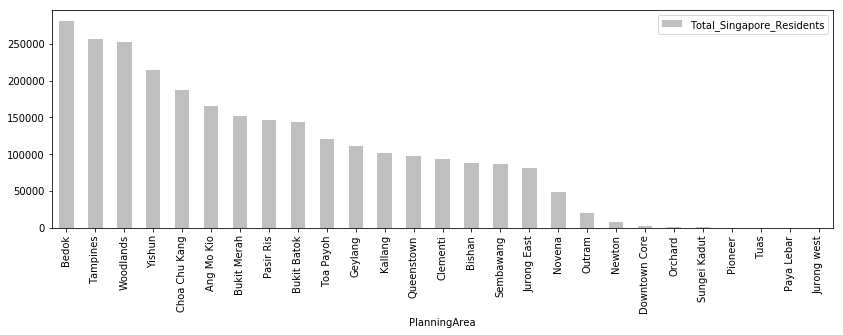

In [18]:
print("Population per Town")
ax1 = SubwayPerTown.plot(kind='bar',
                    #x=Index,
                    y='Total_Singapore_Residents',
                    figsize=(14, 4),
                    alpha=0.5,                  
                    color='Gray')

Number of Stations per Town


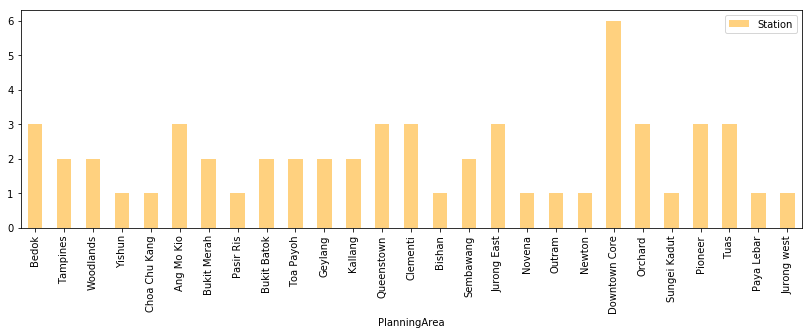

In [19]:
print("Number of Stations per Town")
ax0 = SubwayPerTown.plot(kind='bar',
                    y='Station',
                    figsize=(14, 4),
                    alpha=0.5,                  
                    color='Orange')

- One town can be served by multiple subway stations
- Prioritization of preferred locations to setup the cafe would be based on population size; i.e. potential customer pool
- Bedok, Tampines, Woodlands and Yishun have the higest population density and would be ideal starting points to explore if the subway stations there would be good locations for the cafe

### >>> Strategy Approach: Profile the location of each subway station to map out potential competition and if the presense of other eateries and points of interest could be an indication of high traffic 

### >>> Using Foursqare to extract nearby venues

In [26]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Station', 
                  'Postcode Latitude', 
                  'Postcode Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [27]:
LIMIT = 100
subway_venues = getNearbyVenues(names=EWSubwayLoc['Station'],
                                   latitudes=EWSubwayLoc['Latitude'],
                                   longitudes=EWSubwayLoc['Longitude']
                                  )

Pasir Ris
Tampines
Simei
Tanah Merah
Bedok
Kembangan 
Eunos
Paya Lebar
Aljunied
Kallang 
Lavender 
Bugis 
City Hall
Raffles Place
Tanjong Pagar
Outram Park
Tiong Bahru
Redhill 
Queenstown 
Commonwealth
Buona Vista
Dover
Clementi
Jurong East
Chinese Garden
Lakeside 
Boon Lay
Pioneer
Joo Koon
Gul Circle
Tuas Crescent
Tuas West Road
Tuas Link
Bukit Batok
Bukit Gombak
Choa Chu Kang
Yew Tee
Kranji
Marsiling
Woodlands
Admiralty
Sembawang
Yishun 
Khatib
Yio Chu Kang
Ang Mo Kio
Bishan
Braddell
Toa Payoh
Novena
Newton
Orchard
Somerset
Dhoby Ghaut
Marina Bay
Marina South Pier


In [84]:
print('There are {} uniques categories.'.format(len(subway_venues['Venue Category'].unique())))

There are 238 uniques categories.


### >>> Ranking of top venues by Station and doing a count 

In [85]:
# ONE HOT ENCODING
subway_onehot = pd.get_dummies(subway_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
subway_onehot['Station'] = subway_venues['Station'] 

# move neighborhood column to the first column
fixed_columns = [subway_onehot.columns[-1]] + list(subway_onehot.columns[:-1])
subway_onehot = subway_onehot[fixed_columns]

In [86]:
subway_grouped = subway_onehot.groupby('Station').mean().reset_index()

In [87]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [88]:
# MAP OUT TOP 10 VENUES NEAR EACH STATION 

num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Station']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Station'] = subway_grouped['Station']

for ind in np.arange(subway_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(subway_grouped.iloc[ind, :], num_top_venues)

#neighborhoods_venues_sorted.head(5)

In [89]:
# COUNT NUMBER OF VENUES PER CATEGORY

subway_count = subway_onehot.groupby('Station').sum().reset_index()

### >>> Tabulation of all data by station and rank by town population 
- Focusing on stations in towns with the most residents

In [127]:
# TABULATE ALL INFO TOGETHER BASED ON STATION
# SORT BY TOWN POPULATION

subway_grouped = pd.merge(EWSubwayLoc, subway_count[['Station', 'Café']], how='left', on=['Station'])
subway_grouped = pd.merge(subway_grouped, TownPop, how='left', on=['PlanningArea'])
subway_grouped = pd.merge(subway_grouped, neighborhoods_venues_sorted, how='left', on=['Station'])
subway_grouped.sort_values(['Total_Singapore_Residents'], ascending=False, inplace=True)
subway_grouped.head(10)

,Station,LineName,Latitude,Longitude,PlanningArea,Café,Total_Singapore_Residents,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Tanah Merah,Green,1.327309,103.946440,Bedok,0,281300.0,Noodle House,Indian Restaurant,Basketball Court,Dim Sum Restaurant,Ice Cream Shop,Resort,Restaurant,Chinese Restaurant,Flower Shop,Food Court
4,Bedok,Green,1.324060,103.929920,Bedok,2,281300.0,Coffee Shop,Chinese Restaurant,Japanese Restaurant,Food Court,Bakery,Dessert Shop,Fast Food Restaurant,Sandwich Place,Sushi Restaurant,Supermarket
5,Kembangan,Green,1.320955,103.913040,Bedok,0,281300.0,Chinese Restaurant,Indian Restaurant,Diner,Snack Place,Seafood Restaurant,Supermarket,Noodle House,Coffee Shop,Food Court,Bistro
2,Simei,Green,1.342814,103.953350,Tampines,1,257110.0,Fast Food Restaurant,Hotpot Restaurant,Bakery,Diner,Coffee Shop,Sandwich Place,Chinese Restaurant,Shopping Mall,Noodle House,Café
1,Tampines,Green,1.353464,103.944910,Tampines,4,257110.0,Bakery,Coffee Shop,Café,Chinese Restaurant,Bubble Tea Shop,Gym,Shopping Mall,Dessert Shop,Clothing Store,Pharmacy
39,Woodlands,Red,1.437004,103.786630,Woodlands,3,252530.0,Japanese Restaurant,Café,Asian Restaurant,Clothing Store,Supermarket,Chinese Restaurant,Shopping Mall,Fast Food Restaurant,Food Court,Indian Restaurant
38,Marsiling,Red,1.432697,103.774129,Woodlands,0,252530.0,Asian Restaurant,Coffee Shop,Train Station,Steakhouse,Bubble Tea Shop,Gym,Music Venue,Pizza Place,Japanese Restaurant,Smoke Shop
42,Yishun,Red,1.429217,103.835130,Yishun,1,214940.0,Coffee Shop,Food Court,Supermarket,Grocery Store,Fast Food Restaurant,Chinese Restaurant,Shopping Mall,Bistro,Bookstore,Bubble Tea Shop
35,Choa Chu Kang,Red,1.385410,103.744340,Choa Chu Kang,1,187510.0,Coffee Shop,Fast Food Restaurant,Asian Restaurant,Food Court,Park,Train Station,Shop & Service,Restaurant,Shopping Mall,Bakery
43,Khatib,Red,1.417505,103.832990,Ang Mo Kio,0,165710.0,Coffee Shop,Fast Food Restaurant,Supermarket,Shopping Mall,American Restaurant,Grocery Store,Department Store,Food Truck,Food Court,Bus Stop


----

In [139]:
Finalist = subway_grouped
Finalist = subway_grouped.query('Station == "Tanah Merah" | Station == "Simei" | Station == "Woodlands" | Station == "Yishun"')
Finalist.head(5)

,Station,LineName,Latitude,Longitude,PlanningArea,Café,Total_Singapore_Residents,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Tanah Merah,Green,1.327309,103.94644,Bedok,0,281300.0,Noodle House,Indian Restaurant,Basketball Court,Dim Sum Restaurant,Ice Cream Shop,Resort,Restaurant,Chinese Restaurant,Flower Shop,Food Court
2,Simei,Green,1.342814,103.95335,Tampines,1,257110.0,Fast Food Restaurant,Hotpot Restaurant,Bakery,Diner,Coffee Shop,Sandwich Place,Chinese Restaurant,Shopping Mall,Noodle House,Café
39,Woodlands,Red,1.437004,103.78663,Woodlands,3,252530.0,Japanese Restaurant,Café,Asian Restaurant,Clothing Store,Supermarket,Chinese Restaurant,Shopping Mall,Fast Food Restaurant,Food Court,Indian Restaurant


# DISCUSSIONS 

-  The investor's target market is South East Asia.  Based on GDP per Capita, it can be observed that Singapore is the only South East Asian country in the top 20 list
-  Similarly Singapore is the top South East Asian country by Population Density

- Focus subway lines - East/West and North/South
- The top 3 towns by population are Bedok, Tampines and Woodlands 
- These 3 towns had 3, 2 and 2 number of stations respectively

- A count of number of cafes were made for each of the stations in these towns
- It was then observable which stations had the fewest cafes within 500 metres and were the preferred location
- At Bedok Town, there was however a tie between Tanah Merah and Kembangan Station, as both had 0 cafes
- Kembangan was chosen over Tanah Merah, as 9 out of top 10 venue types were eateries implying that the location is likely considered a target location for F&B; At Tanah Merah, only 7 out of the top 10 venues were food & beverage locations;  (i.e. more existing eateries means a more attractive location; a draw to the local population)

# CONCLUSIONS

Top 3 subway locations to setup a speciality coffee cafe are:
- 1) Town: Bedok -> Station: Kembangan (
- 2) Town: Tampines -> Station: Simei
- 3) Town: Woodlands -> Station: Marsiling

Decision driven by total population by town which implies potential target market and the selection of subway based on the descriptive profile of its surroundings (i.e. more existing eateries means a more attractive location; a draw to the local population)

In [140]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lon, poi, cluster in zip(Finalist['Latitude'], Finalist['Longitude'], Finalist['Station'], Finalist['LineName']):
    label = folium.Popup(str(poi) + ' Cluster, ' + str(cluster) + ' line', parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_opacity=0.7).add_to(map_clusters)

Finalist.head()
map_clusters